In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from ydata_profiling import ProfileReport

In [6]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as plt
import cufflinks as cl

In [8]:
!pip install cufflinks

In [10]:
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
py.offline.init_notebook_mode(connected=True)
cl.go_offline()

In [14]:
import sweetviz as sv

In [16]:
ds=pd.read_csv('C:\\Users\\Admin\\excel\\Pune_property_data.csv')

In [18]:
ds.head()

,Unnamed: 0,additionalrooms,age,amenitiesavailable,amenitiesnot,area,balconies,bathroom,bhk,carpetarea,...,opensides,overlooking,ownership,possesiondate,price,pricepersquare,projectname,roadfaceing,status,totalfloor
0,0,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,Indoor...","24 X 7 Security,Children's play area,Club Hous...","1,611 sq ft",2,3,3 BHK Apartment,1209 sq ft,...,2,Road View,Co-Operative Society,NaN,27000000,"₹ 16,759/ sq ft",Bhansali Prive Rio,40 feet,Ready to move,6
1,1,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Sports Facility,Landscape...","1,279 sq ft",NaN,2,2 BHK Apartment,NaN,...,NaN,NaN,Freehold,NaN,7610050,"₹ 5,950/ sq ft",Goel Ganga Platino,NaN,Ready to move,NaN
2,2,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...",Sports Facility,670 sq ft,NaN,1,1 BHK Apartment,NaN,...,NaN,NaN,Freehold,NaN,4100000,"₹ 6,119/ sq ft",Vilas Javdekar Yashwin,NaN,Ready to move,NaN
3,3,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,24 X 7...","Sports Facility,Landscaped Gardens",956 sq ft,NaN,2,2 BHK Apartment,615 sq ft,...,NaN,NaN,Freehold,NaN,5736000,"₹ 6,000/ sq ft",Rohan Ishan,NaN,Ready to move,NaN
4,4,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Club House,Swimming Pool,Sports Facility,Joggi...","1,706 sq ft",1,3,3 BHK Apartment,1195 sq ft,...,2,Road View,Freehold,NaN,29002000,"₹ 17,000/ sq ft",Swojas Aavishkar,60 feet,Ready to move,9


In [22]:
#we can see our dataset has too many null values.we need to treat this values so that it dosen't lead to underfitting.

In [24]:
ds.drop(['ownership', 'possesiondate', 'projectname', 'roadfaceing'], axis=1, inplace=True)
#we will drop the above columns as they don't have a significance in our model.

In [28]:
#some of the feature's missing values can be treated as zero
cols_to_fill_zero=['age','amenitiesavailable','facing','floor','opensides','overlooking','status']
ds[cols_to_fill_zero]=ds[cols_to_fill_zero].fillna(0)

In [30]:
ds.head()

,Unnamed: 0,additionalrooms,age,amenitiesavailable,amenitiesnot,area,balconies,bathroom,bhk,carpetarea,facing,floor,locality,neworold,opensides,overlooking,price,pricepersquare,status,totalfloor
0,0,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,Indoor...","24 X 7 Security,Children's play area,Club Hous...","1,611 sq ft",2,3,3 BHK Apartment,1209 sq ft,West,"3,",Deccan Gymkhana,New,2,Road View,27000000,"₹ 16,759/ sq ft",Ready to move,6
1,1,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Sports Facility,Landscape...","1,279 sq ft",NaN,2,2 BHK Apartment,NaN,NorthEast,1,Kharadi,New,0,0,7610050,"₹ 5,950/ sq ft",Ready to move,NaN
2,2,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...",Sports Facility,670 sq ft,NaN,1,1 BHK Apartment,NaN,NorthEast,1,Sus,New,0,0,4100000,"₹ 6,119/ sq ft",Ready to move,NaN
3,3,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,24 X 7...","Sports Facility,Landscaped Gardens",956 sq ft,NaN,2,2 BHK Apartment,615 sq ft,NorthEast,1,Bavdhan,New,0,0,5736000,"₹ 6,000/ sq ft",Ready to move,NaN
4,4,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Club House,Swimming Pool,Sports Facility,Joggi...","1,706 sq ft",1,3,3 BHK Apartment,1195 sq ft,West,"6,",Deccan Gymkhana,New,2,Road View,29002000,"₹ 17,000/ sq ft",Ready to move,9


Data PreProcessing

In [ ]:
ds['area'] = ds['area'].str.replace(',', '')  # Remove commas
ds['area'] = ds['area'].str.replace('sq ft', '')  # Remove 'sq ft'
ds['area'] = pd.to_numeric(ds['area'], errors='coerce')  # Convert to numeric, force invalid to NaN

# Fill missing values with the mean of the column
ds['area'] = ds['area'].fillna(ds['area'].mean())


In [ ]:
ds.head()

In [37]:
ds.tail()

,Unnamed: 0,additionalrooms,age,amenitiesavailable,amenitiesnot,area,balconies,bathroom,bhk,carpetarea,facing,floor,locality,neworold,opensides,overlooking,price,pricepersquare,status,totalfloor
37534,37534,1 rooms( pooja room ),0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...","1,084 sq ft",1,2,2 BHK Apartment,814 sq ft,East,"6,",Baner,New,4,Garden View,8363000,"₹ 7,714/ sq ft",Ready to move,12
37535,37535,1 rooms( pooja room ),0,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...",953 sq ft,1,2,2 BHK Apartment,706 sq ft,East,"7,",Wakad,New,4,Garden View,6338000,"₹ 6,650/ sq ft",Under Construction,12
37536,37536,1 rooms( pooja room ),0,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...","1,218 sq ft",1,2,2 BHK Apartment,901 sq ft,East,"6,",Hinjewadi,New,4,Garden View,8100000,"₹ 6,650/ sq ft",Under Construction,12
37537,37537,1 rooms( pooja room ),0,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...","1,074 sq ft",1,2,2 BHK Apartment,796 sq ft,East,"6,",Bavdhan,New,4,Garden View,7780000,"₹ 7,243/ sq ft",Under Construction,12
37538,37538,"2 rooms( servant room, pooja room )",0,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...","4,561 sq ft",2,4,4 BHK Apartment,3379 sq ft,West,"6,",Aundh,New,4,Garden View,47800000,"₹ 10,480/ sq ft",Under Construction,12


In [39]:
ds.isna().sum()

Unnamed: 0                0
additionalrooms       28218
age                       0
amenitiesavailable        0
amenitiesnot           3253
area                     21
balconies             15628
bathroom               2872
bhk                       1
carpetarea            28917
facing                    0
floor                     0
locality                  1
neworold                  1
opensides                 0
overlooking               0
price                     1
pricepersquare            1
status                    0
totalfloor            13425
dtype: int64

In [41]:
# Convert 'balconies' to numeric
ds['balconies'] = pd.to_numeric(ds['balconies'], errors='coerce')
# Convert 'bathroom' to numeric
ds['bathroom'] = pd.to_numeric(ds['bathroom'], errors='coerce')


In [43]:
ds['balconies'] = ds['balconies'].fillna(ds['balconies'].mean())
ds['bathroom'] = ds['bathroom'].fillna(ds['bathroom'].mean())


In [51]:
# Convert all values in the 'totalfloor' column to strings
ds['totalfloor'] = ds['totalfloor'].astype(str)

# Remove commas and any other unwanted text
ds['totalfloor'] = ds['totalfloor'].str.replace(',', '')  # Remove commas
ds['totalfloor'] = ds['totalfloor'].str.replace('sq ft', '')  # Remove 'sq ft'

# Convert the cleaned column back to numeric
ds['totalfloor'] = pd.to_numeric(ds['totalfloor'], errors='coerce')


In [55]:
print(ds['additionalrooms'].dtype)


object


In [57]:
print(ds['additionalrooms'].isnull().sum())  

28218


In [61]:
ds['additionalrooms'] = ds['additionalrooms'].fillna(0) 

In [63]:
ds.isna().sum()

Unnamed: 0                0
additionalrooms           0
age                       0
amenitiesavailable        0
amenitiesnot           3253
area                     21
balconies                 0
bathroom                  0
bhk                       1
carpetarea            28939
facing                    0
floor                     0
locality                  1
neworold                  1
opensides                 0
overlooking               0
price                     1
pricepersquare            1
status                    0
totalfloor            13447
dtype: int64

In [65]:
#Checking Missing Values and the % if exists
missing_values = ds.isnull().sum()  # Count missing values
total_values = len(ds)  # Total number of rows
missing_percentage = round(((missing_values / total_values) * 100),2) # Calculate percentage

# Create a result DataFrame
missing_ds = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage})
missing_ds

,Missing Values,Percentage (%)
Unnamed: 0,0,0.00
additionalrooms,0,0.00
age,0,0.00
amenitiesavailable,0,0.00
amenitiesnot,3253,8.67
area,21,0.06
balconies,0,0.00
bathroom,0,0.00
bhk,1,0.00
carpetarea,28939,77.09


In [67]:
ds['amenitiesnot'] = ds['amenitiesnot'].fillna(0) 

In [73]:
ds.isna().sum()

Unnamed: 0                0
additionalrooms           0
age                       0
amenitiesavailable        0
amenitiesnot              0
area                     21
balconies                 0
bathroom                  0
bhk                       1
carpetarea            28939
facing                    0
floor                     0
locality                  1
neworold                  1
opensides                 0
overlooking               0
price                     1
pricepersquare            1
status                    0
totalfloor            13447
dtype: int64

In [79]:
# Convert the column to string
ds['carpetarea'] = ds['carpetarea'].astype(str)

# Remove commas and 'sq ft', then convert to numeric
ds['carpetarea'] = ds['carpetarea'].str.replace(',', '', regex=False)
ds['carpetarea'] = ds['carpetarea'].str.replace('sq ft', '', regex=False)
ds['carpetarea'] = pd.to_numeric(ds['carpetarea'], errors='coerce')


In [81]:
ds.isna().sum()

Unnamed: 0                0
additionalrooms           0
age                       0
amenitiesavailable        0
amenitiesnot              0
area                     21
balconies                 0
bathroom                  0
bhk                       1
carpetarea            28939
facing                    0
floor                     0
locality                  1
neworold                  1
opensides                 0
overlooking               0
price                     1
pricepersquare            1
status                    0
totalfloor            13447
dtype: int64

In [85]:
# Calculate the mean of the column, ignoring NaN values
mean_value = ds['carpetarea'].mean()

# Fill NaN values with the calculated mean
ds['carpetarea'].fillna(mean_value, inplace=True)


In [89]:
ds.isna().sum()

Unnamed: 0                0
additionalrooms           0
age                       0
amenitiesavailable        0
amenitiesnot              0
area                     21
balconies                 0
bathroom                  0
bhk                       1
carpetarea                0
facing                    0
floor                     0
locality                  1
neworold                  1
opensides                 0
overlooking               0
price                     1
pricepersquare            1
status                    0
totalfloor            13447
dtype: int64

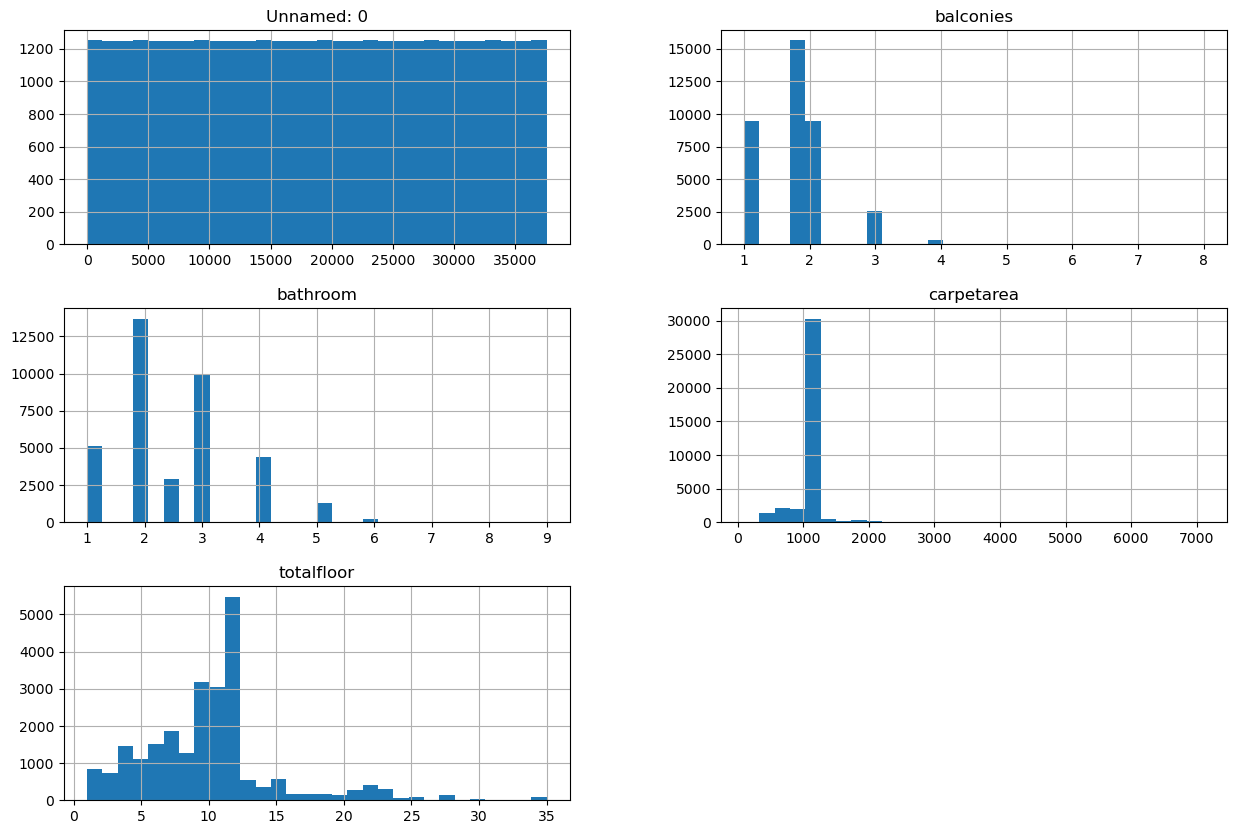

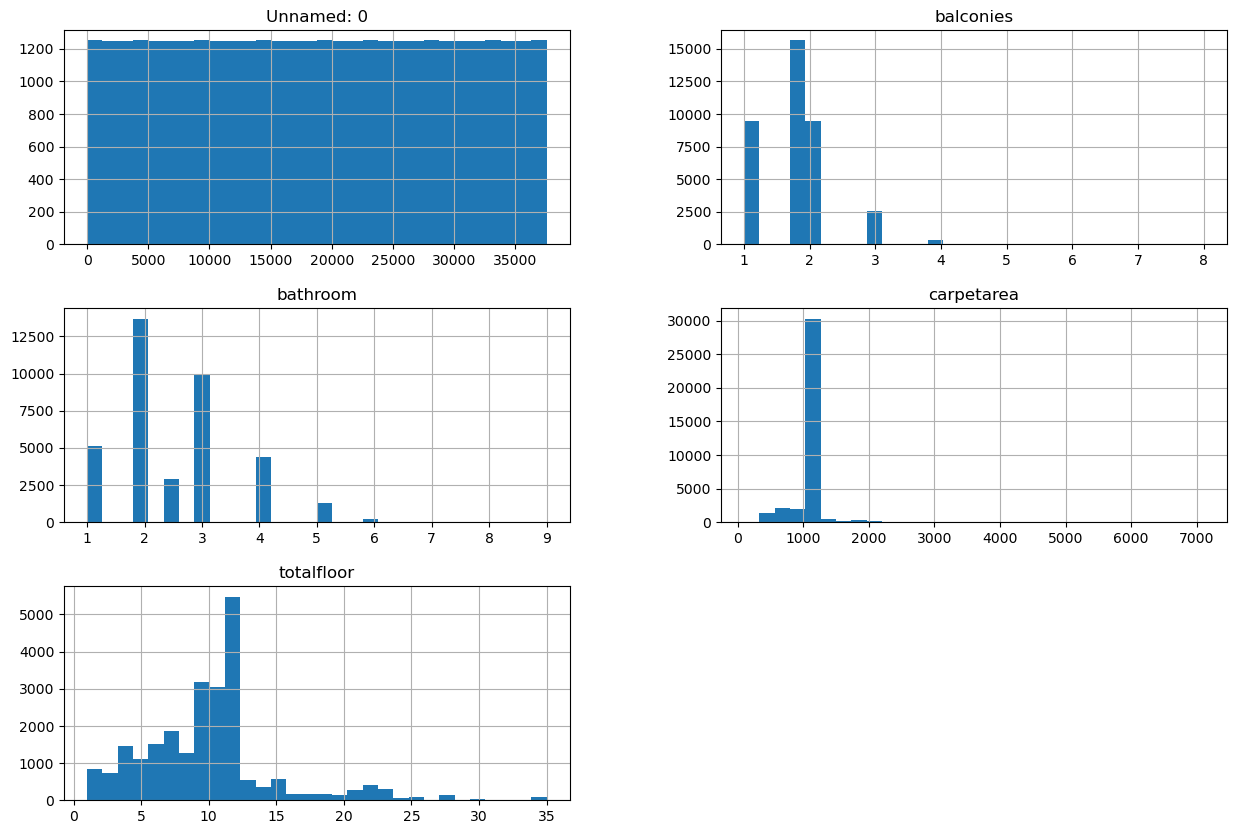

In [95]:
import matplotlib.pyplot as plt
ds.hist(figsize=(15,10),bins=30)
plt.show()

In [99]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37539 entries, 0 to 37538
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          37539 non-null  int64  
 1   additionalrooms     37539 non-null  object 
 2   age                 37539 non-null  object 
 3   amenitiesavailable  37539 non-null  object 
 4   amenitiesnot        37539 non-null  object 
 5   area                37518 non-null  object 
 6   balconies           37539 non-null  float64
 7   bathroom            37539 non-null  float64
 8   bhk                 37538 non-null  object 
 9   carpetarea          37539 non-null  float64
 10  facing              37539 non-null  object 
 11  floor               37539 non-null  object 
 12  locality            37538 non-null  object 
 13  neworold            37538 non-null  object 
 14  opensides           37539 non-null  object 
 15  overlooking         37539 non-null  object 
 16  pric

In [101]:
# Select only numeric columns
numeric_ds = ds.select_dtypes(include=['number'])

# Compute correlation
correlation_matrix = numeric_ds.corr()
print(correlation_matrix)


            Unnamed: 0  balconies  bathroom  carpetarea  totalfloor
Unnamed: 0    1.000000  -0.002472 -0.103662    0.033121   -0.008173
balconies    -0.002472   1.000000  0.417331    0.234877    0.086939
bathroom     -0.103662   0.417331  1.000000    0.355864    0.173035
carpetarea    0.033121   0.234877  0.355864    1.000000    0.075201
totalfloor   -0.008173   0.086939  0.173035    0.075201    1.000000


In [103]:
ds['carpetarea'] = pd.to_numeric(ds['carpetarea'], errors='coerce') 

In [105]:
print(ds['carpetarea'])

0        1209.000000
1        1036.668605
2        1036.668605
3         615.000000
4        1195.000000
            ...     
37534     814.000000
37535     706.000000
37536     901.000000
37537     796.000000
37538    3379.000000
Name: carpetarea, Length: 37539, dtype: float64


In [109]:
ds.tail()

,Unnamed: 0,additionalrooms,age,amenitiesavailable,amenitiesnot,area,balconies,bathroom,bhk,carpetarea,facing,floor,locality,neworold,opensides,overlooking,price,pricepersquare,status,totalfloor
37534,37534,1 rooms( pooja room ),0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...","1,084 sq ft",1.0,2.0,2 BHK Apartment,814.0,East,"6,",Baner,New,4,Garden View,8363000,"₹ 7,714/ sq ft",Ready to move,12.0
37535,37535,1 rooms( pooja room ),0,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...",953 sq ft,1.0,2.0,2 BHK Apartment,706.0,East,"7,",Wakad,New,4,Garden View,6338000,"₹ 6,650/ sq ft",Under Construction,12.0
37536,37536,1 rooms( pooja room ),0,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...","1,218 sq ft",1.0,2.0,2 BHK Apartment,901.0,East,"6,",Hinjewadi,New,4,Garden View,8100000,"₹ 6,650/ sq ft",Under Construction,12.0
37537,37537,1 rooms( pooja room ),0,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...","1,074 sq ft",1.0,2.0,2 BHK Apartment,796.0,East,"6,",Bavdhan,New,4,Garden View,7780000,"₹ 7,243/ sq ft",Under Construction,12.0
37538,37538,"2 rooms( servant room, pooja room )",0,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Club House,Gymnasium,Spor...","4,561 sq ft",2.0,4.0,4 BHK Apartment,3379.0,West,"6,",Aundh,New,4,Garden View,47800000,"₹ 10,480/ sq ft",Under Construction,12.0


In [115]:
print(ds['additionalrooms'])

0                                          0
1                                          0
2                                          0
3                                          0
4                                          0
                        ...                 
37534                  1 rooms( pooja room )
37535                  1 rooms( pooja room )
37536                  1 rooms( pooja room )
37537                  1 rooms( pooja room )
37538    2 rooms( servant room, pooja room )
Name: additionalrooms, Length: 37539, dtype: object


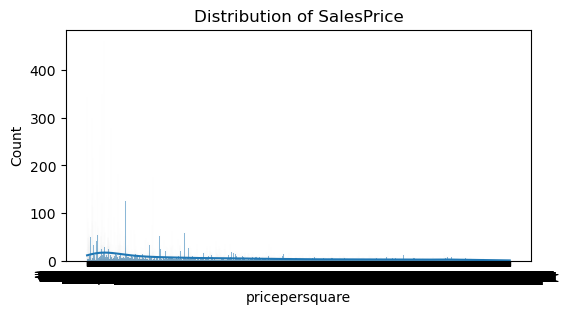

<Axes: xlabel='price', ylabel='Count'>

In [124]:
#DATA VISUALIZATION
# Distribution of SalePrice
plt.figure(figsize=(6, 3))
sns.histplot(ds['pricepersquare'], kde=True)
plt.title('Distribution of SalesPrice')
plt.show()
sns.histplot(ds['price'], kde=True, bins=30)


In [130]:
X=ds.drop(columns=['price'])
y=ds['price']

In [132]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [134]:
#performing linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression

In [142]:
ds.drop(['additionalrooms'], axis=1, inplace=True)

In [146]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37539 entries, 0 to 37538
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          37539 non-null  int64  
 1   age                 37539 non-null  object 
 2   amenitiesavailable  37539 non-null  object 
 3   amenitiesnot        37539 non-null  object 
 4   area                37518 non-null  object 
 5   balconies           37539 non-null  float64
 6   bathroom            37539 non-null  float64
 7   bhk                 37538 non-null  object 
 8   carpetarea          37539 non-null  float64
 9   facing              37539 non-null  object 
 10  floor               37539 non-null  object 
 11  locality            37538 non-null  object 
 12  neworold            37538 non-null  object 
 13  opensides           37539 non-null  object 
 14  overlooking         37539 non-null  object 
 15  price               37538 non-null  object 
 16  pric

In [148]:
print(X_train.head())
print(y_train.head())

       Unnamed: 0          additionalrooms            age  \
37327       37327                        0    5 - 6 years   
15920       15920                        0     0 - 1 year   
12407       12407                        0    5 - 6 years   
8139         8139  1 rooms( servant room )  10 - 11 years   
12725       12725                        0              0   

                                      amenitiesavailable  \
37327  Lift Available,Car Parking,Power Backup,24 X 7...   
15920  Lift Available,Car Parking,Power Backup,24 X 7...   
12407                                                  0   
8139   Lift Available,Car Parking,Power Backup,24 X 7...   
12725                                                  0   

                                            amenitiesnot         area  \
37327                 Sports Facility,Landscaped Gardens  1,008 sq ft   
15920                                                  0    992 sq ft   
12407  Lift Available,Power Backup,24 X 7 Security,Ch

In [150]:
import re
X_train = X_train.applymap(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else 0)


In [152]:
y_train = pd.to_numeric(y_train, errors='coerce')


In [154]:
X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)


In [156]:
# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [162]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,y_train)

In [166]:
X_test.fillna(0, inplace=True) 

In [170]:

# Process X_test to extract numeric values or replace with a default
X_test = X_test.applymap(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else 0)


In [172]:
print(X_test.dtypes)


Unnamed: 0            int64
additionalrooms       int64
age                   int64
amenitiesavailable    int64
amenitiesnot          int64
area                  int64
balconies             int64
bathroom              int64
bhk                   int64
carpetarea            int64
facing                int64
floor                 int64
locality              int64
neworold              int64
opensides             int64
overlooking           int64
pricepersquare        int64
status                int64
totalfloor            int64
dtype: object


In [176]:
print(y_test.dtype)


object


In [178]:
y_test = pd.to_numeric(y_test, errors='coerce')


In [180]:
y_test.fillna(y_test.mean(), inplace=True)


In [182]:
print(y_test.dtype)
print(X_test.dtypes)


float64
Unnamed: 0            int64
additionalrooms       int64
age                   int64
amenitiesavailable    int64
amenitiesnot          int64
area                  int64
balconies             int64
bathroom              int64
bhk                   int64
carpetarea            int64
facing                int64
floor                 int64
locality              int64
neworold              int64
opensides             int64
overlooking           int64
pricepersquare        int64
status                int64
totalfloor            int64
dtype: object


In [186]:
reg.score(X_train,y_train)

0.5000442840345962

In [184]:
reg.score(X_test, y_test)


0.4939454560644716